HIV Model James Ho

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [5]:
system = System(init = State(R=200, L=0, E=0, V=4*10**-7),
                alpha=3.6*10**-2, 
                miu=1.36*10**-3, 
                beta=0.00027, 
                gamma=1.36, 
                delta=0.33, 
                pi=100, 
                sigma=2, 
                tau=0.2, 
                rho=0.1,
                t_0=0,
                t_end=80,
                dt = 0.1)

,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
alpha,0.036
miu,0.00136
beta,0.00027
gamma,1.36
delta,0.33
pi,100
sigma,2
tau,0.2
rho,0.1


In [6]:
def update_func(state, system, t):
    r, l, e, v = state
    
    actively_uninfected = system.gamma*system.tau - system.miu*r - system.beta*r*v
    latently_infected = system.rho*system.beta*r*v - system.miu*l - system.alpha*l
    actively_infected = (1-system.rho)*system.beta*r*v + system.alpha*l - system.delta*e
    free_virons = system.pi*e - system.sigma*v
    
    r += actively_uninfected*system.dt
    l += latently_infected*system.dt
    e += actively_infected*system.dt
    v += free_virons*system.dt
    return State(R=r, L=l, E=e, V=v)

In [7]:
def slop_func(state, t, system):
    r, l, e, v = state
    
    actively_uninfected = system.gamma*system.tau - system.miu*r - system.beta*r*v
    latently_infected = system.rho*system.beta*r*v - system.miu*l - system.alpha*l
    actively_infected = (1-system.rho)*system.beta*r*v + system.alpha*l - system.delta*e
    free_virons = system.pi*e - system.sigma*v
    
    return actively_uninfected, latently_infected, actively_infected, free_virons
    

In [9]:
slop_func(system.init, 1, system)

(-2.1599999999999998e-08, 2.16e-09, 1.9439999999999997e-08, -8e-07)

In [14]:
results, details = run_ode_solver(system, slop_func, max_step = 2)

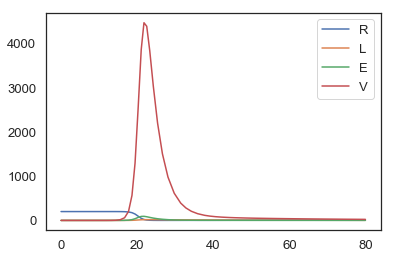

In [15]:
results.plot()

In [4]:
def run_sim(system, update_func):
    """
    This function will update the state a given number of times
    It will store each update in a Timeframe object
    It will then return the TimeFrame object
    
    system: a system object containing the initial state of the system and parameters
    update_func: a function that takes in a state and performs an update on it. It returns a new state object.
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[0] = system.init
    # Define how many iterations to run through
    iters = linrange(0, system.t_end/system.dt)
    for t in iters:
        frame.row[t+1] = update_func(frame.row[t], system, t)
    
    return frame

In [8]:
results = run_sim(system, update_func);

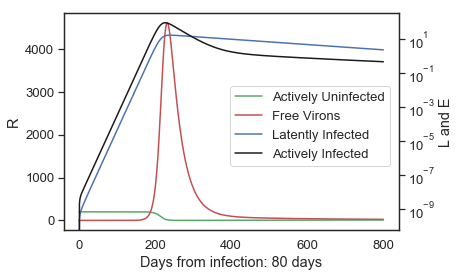

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(results.R, label = "R", color = 'g')
ax1.plot(results.V, label = "V", color = 'r')
ax1.set_ylabel('R')
ax1.set_xlabel("Days from infection: " + str(int((results.shape[0]-1)*system.dt))+" days")

ax2 = ax1.twinx()
ax2.semilogy(results.L, label = "L", color = 'b')
ax2.semilogy(results.E, label = "E", color = 'k')
ax2.set_ylabel('L and E')


fig.legend(["Actively Uninfected", "Free Virons", "Latently Infected", "Actively Infected"], loc=[0.5,0.4])